In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('superstore_dataset2012.csv')



## Configuraci?n de estilo para los gr?ficos
Se definen paletas y ajustes globales de Matplotlib/Seaborn para mantener colores consistentes, t?tulos descriptivos y ejes legibles en todas las visualizaciones.


In [ ]:
# Ajustes globales de estilo y paletas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'figure.facecolor': 'white'
})

highlight_colors = {
    'sales': '#1f78b4',
    'profit': '#33a02c',
    'loss': '#e31a1c',
    'shipping': '#ff7f00'
}

print('Estilo global actualizado. Usa highlight_colors para mantener consistencia cromatica.')


## Exploración Inicial del Dataset

### 1. Estructura y Dimensiones

In [ ]:
# Información general del dataset
print("=" * 60)
print("DIMENSIONES DEL DATASET")
print("=" * 60)
print(f"Filas: {data.shape[0]}")
print(f"Columnas: {data.shape[1]}")
print(f"\nNombre de columnas:")
print(data.columns.tolist())

DIMENSIONES DEL DATASET
Filas: 4246
Columnas: 24

Nombre de columnas:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']


### 2. Tipos de Datos

In [13]:
# Tipos de datos
print("\n" + "=" * 60)
print("TIPOS DE DATOS")
print("=" * 60)
print(data.dtypes)
print(f"\nResumen de tipos:")
print(data.dtypes.value_counts())



TIPOS DE DATOS
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

Resumen de tipos:
object     17
float64     5
int64       2
Name: count, dtype: int64


### 3. Valores Nulos

In [7]:
# Valores nulos
print("\n" + "=" * 60)
print("VALORES NULOS")
print("=" * 60)
null_counts = data.isnull().sum()
null_percentages = (data.isnull().sum() / len(data)) * 100

null_info = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
})

print(null_info)
print(f"\nTotal de valores nulos en el dataset: {data.isnull().sum().sum()}")


VALORES NULOS
           Columna  Valores Nulos  Porcentaje
0           Row ID              0    0.000000
1         Order ID              0    0.000000
2       Order Date              0    0.000000
3        Ship Date              0    0.000000
4        Ship Mode              0    0.000000
5      Customer ID              0    0.000000
6    Customer Name              0    0.000000
7          Segment              0    0.000000
8             City              0    0.000000
9            State              0    0.000000
10         Country              0    0.000000
11     Postal Code           3423   80.617051
12          Market              0    0.000000
13          Region              0    0.000000
14      Product ID              0    0.000000
15        Category              0    0.000000
16    Sub-Category              0    0.000000
17    Product Name              0    0.000000
18           Sales              0    0.000000
19        Quantity              0    0.000000
20        Discount 

### 4. Estadísticas Descriptivas

In [8]:
# Estadísticas descriptivas detalladas
print("\n" + "=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
print(data.describe(include='all').T)


ESTADÍSTICAS DESCRIPTIVAS
                 count unique              top  freq          mean  \
Row ID          4246.0    NaN              NaN   NaN  25248.240226   
Order ID          4246   2127    IN-2012-44194    11           NaN   
Order Date        4246    141        8/11/2012    88           NaN   
Ship Date         4246    203        7/12/2012    73           NaN   
Ship Mode         4246      4   Standard Class  2668           NaN   
Customer ID       4246    999         GH-14425    21           NaN   
Customer Name     4246    739       Gary Hwang    22           NaN   
Segment           4246      3         Consumer  2284           NaN   
City              4246   1083    New York City   112           NaN   
State             4246    537         New York   136           NaN   
Country           4246    112    United States   823           NaN   
Postal Code      823.0    NaN              NaN   NaN  48442.910085   
Market            4246      7             APAC   916           

### 5. Transformaciones de Datos - Convertir Columnas de Fechas

In [9]:
# Identificar y convertir columnas de fechas
print("\n" + "=" * 60)
print("TRANSFORMACIONES DE DATOS")
print("=" * 60)

# Buscar columnas que contengan 'Date' o 'date' en el nombre
date_columns = [col for col in data.columns if 'date' in col.lower()]
print(f"\nColumnas con fechas detectadas: {date_columns}")

# Convertir las columnas de fechas al tipo datetime
for col in date_columns:
    try:
        data[col] = pd.to_datetime(data[col])
        print(f"✓ Columna '{col}' convertida a datetime correctamente")
    except Exception as e:
        print(f"✗ Error al convertir '{col}': {e}")

# Mostrar los nuevos tipos de datos
print("\n" + "=" * 60)
print("NUEVOS TIPOS DE DATOS")
print("=" * 60)
print(data.dtypes)


TRANSFORMACIONES DE DATOS

Columnas con fechas detectadas: ['Order Date', 'Ship Date']
✓ Columna 'Order Date' convertida a datetime correctamente
✗ Error al convertir 'Ship Date': time data "13-01-2012" doesn't match format "%m/%d/%Y", at position 119. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

NUEVOS TIPOS DE DATOS
Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date                 object
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code    

### 6. Muestras de Datos Transformados

In [10]:
# Mostrar muestra de los datos transformados
print("\n" + "=" * 60)
print("PRIMERAS FILAS DESPUÉS DE TRANSFORMACIONES")
print("=" * 60)
print(data.head(10))

print("\n" + "=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET FINAL")
print("=" * 60)
print(f"Dimensiones: {data.shape[0]} filas × {data.shape[1]} columnas")
print(f"Memoria utilizada: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


PRIMERAS FILAS DESPUÉS DE TRANSFORMACIONES
   Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   21896    ID-2012-71858 2012-01-02  7/2/2012  Standard Class    CP-12085   
1    4323   MX-2012-154459 2012-01-02  6/2/2012  Standard Class    JF-15190   
2    2829   MX-2012-114461 2012-01-02  5/2/2012  Standard Class    RM-19375   
3    2828   MX-2012-114461 2012-01-02  5/2/2012  Standard Class    RM-19375   
4    6762   MX-2012-151904 2012-01-02  3/2/2012     First Class    DJ-13420   
5    2827   MX-2012-114461 2012-01-02  5/2/2012  Standard Class    RM-19375   
6   47271      NI-2012-390 2012-01-02  5/2/2012  Standard Class     PP-8955   
7   21897    ID-2012-71858 2012-01-02  7/2/2012  Standard Class    CP-12085   
8   15611  ES-2012-2785188 2012-01-02  6/2/2012  Standard Class    RA-19945   
9   46486     BO-2012-7240 2012-01-02  5/2/2012  Standard Class     BT-1305   

    Customer Name      Segment           City      State  ...  \
0  Cathy Prescott    

## Visualizaciones Univariantes con Matplotlib

### 1. Histogramas de Variables Numéricas

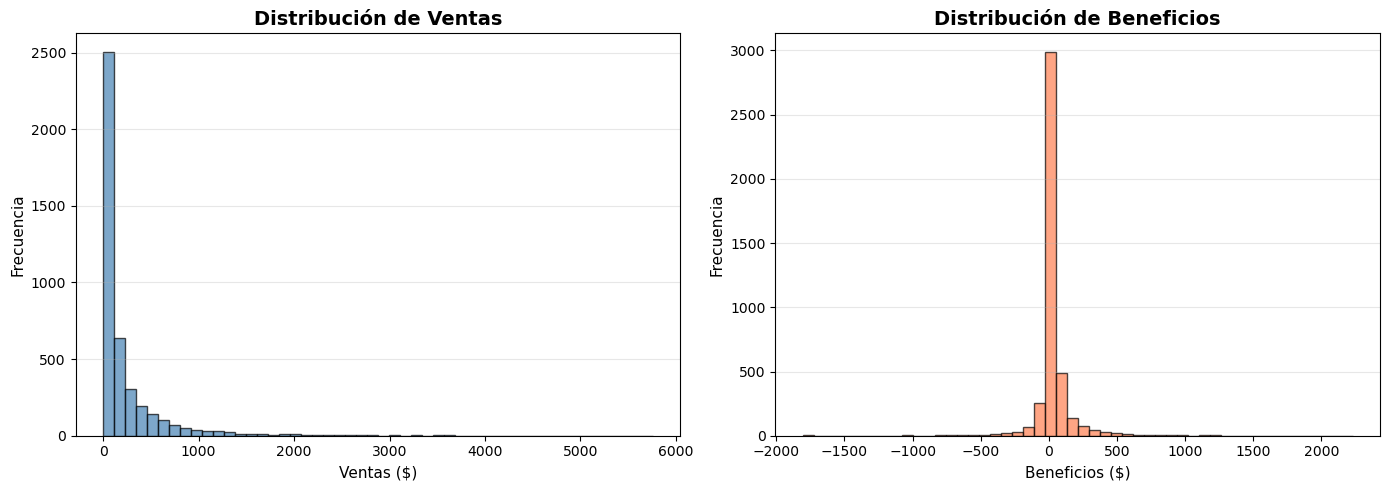

ESTADÍSTICAS - VENTAS Y BENEFICIOS

VENTAS:
  Media: $237.03
  Mediana: $82.53
  Mín: $1.11
  Máx: $5759.96
  Desv. Est.: $426.97

BENEFICIOS:
  Media: $27.70
  Mediana: $9.03
  Mín: $-1806.24
  Máx: $2229.02
  Desv. Est.: $147.46


In [14]:
# Histograma de Ventas (Sales)
# Conclusi?n: muestra que la mayor?a de ?rdenes tienen ventas peque?as y solo unos pocos pedidos extremos explican el rango alto, lo que orienta la segmentaci?n comercial.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Ventas
axes[0].hist(data['Sales'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Ventas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ventas ($)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Histograma de Beneficios (Profit)
axes[1].hist(data['Profit'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Beneficios', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Beneficios ($)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("ESTADÍSTICAS - VENTAS Y BENEFICIOS")
print("=" * 60)
print(f"\nVENTAS:")
print(f"  Media: ${data['Sales'].mean():.2f}")
print(f"  Mediana: ${data['Sales'].median():.2f}")
print(f"  Mín: ${data['Sales'].min():.2f}")
print(f"  Máx: ${data['Sales'].max():.2f}")
print(f"  Desv. Est.: ${data['Sales'].std():.2f}")

print(f"\nBENEFICIOS:")
print(f"  Media: ${data['Profit'].mean():.2f}")
print(f"  Mediana: ${data['Profit'].median():.2f}")
print(f"  Mín: ${data['Profit'].min():.2f}")
print(f"  Máx: ${data['Profit'].max():.2f}")
print(f"  Desv. Est.: ${data['Profit'].std():.2f}")

### 2. Gráficos de Barras - Variables Categóricas

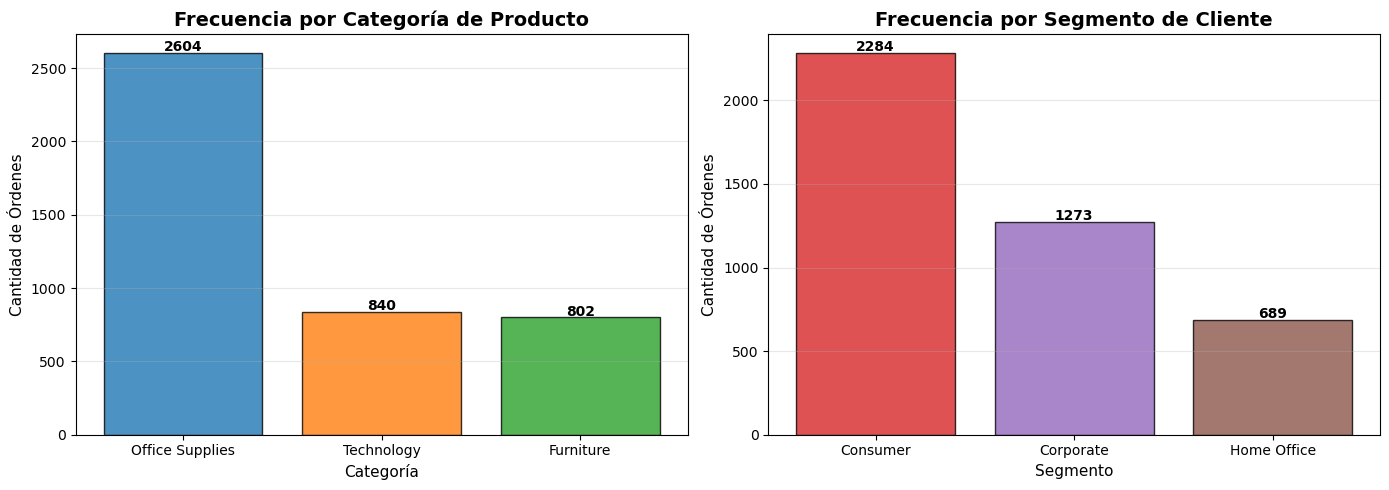

ANÁLISIS DE FRECUENCIAS - CATEGORÍAS Y SEGMENTOS

DISTRIBUCIÓN POR CATEGORÍA:
Category
Office Supplies    2604
Technology          840
Furniture           802
Name: count, dtype: int64

DISTRIBUCIÓN POR SEGMENTO:
Segment
Consumer       2284
Corporate      1273
Home Office     689
Name: count, dtype: int64


In [15]:
# Gráfico de barras para Categoría
# Conclusi?n: evidencia qu? categor?as aportan m?s ventas en unidades y ayuda a priorizar inventario y campa?as.
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Categorías
category_counts = data['Category'].value_counts()
colors1 = ['#1f77b4', '#ff7f0e', '#2ca02c']
axes[0].bar(category_counts.index, category_counts.values, color=colors1, edgecolor='black', alpha=0.8)
axes[0].set_title('Frecuencia por Categoría de Producto', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categoría', fontsize=11)
axes[0].set_ylabel('Cantidad de Órdenes', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (idx, val) in enumerate(zip(category_counts.index, category_counts.values)):
    axes[0].text(i, val + 10, str(val), ha='center', fontsize=10, fontweight='bold')

# Segmentos
segment_counts = data['Segment'].value_counts()
colors2 = ['#d62728', '#9467bd', '#8c564b']
axes[1].bar(segment_counts.index, segment_counts.values, color=colors2, edgecolor='black', alpha=0.8)
axes[1].set_title('Frecuencia por Segmento de Cliente', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Segmento', fontsize=11)
axes[1].set_ylabel('Cantidad de Órdenes', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (idx, val) in enumerate(zip(segment_counts.index, segment_counts.values)):
    axes[1].text(i, val + 10, str(val), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("=" * 60)
print("ANÁLISIS DE FRECUENCIAS - CATEGORÍAS Y SEGMENTOS")
print("=" * 60)
print(f"\nDISTRIBUCIÓN POR CATEGORÍA:")
print(category_counts)
print(f"\nDISTRIBUCIÓN POR SEGMENTO:")
print(segment_counts)

### 3. Histograma de Cantidad (Quantity)

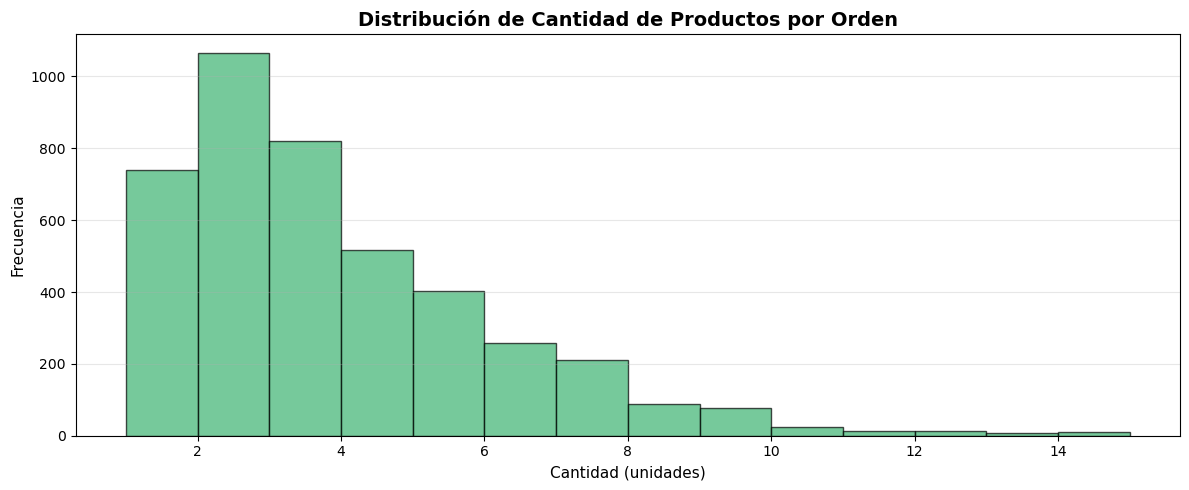

ESTADÍSTICAS - CANTIDAD
Media: 3.44 unidades
Mediana: 3.00 unidades
Mín: 1 unidades
Máx: 14 unidades
Desv. Est.: 2.23 unidades

Valores únicos: 14


In [16]:
# Histograma de Cantidad
# Conclusi?n: la distribuci?n sesgada confirma que pocas ?rdenes manejan muchas unidades, ?til para ajustar log?stica.
fig, ax = plt.subplots(figsize=(12, 5))

ax.hist(data['Quantity'], bins=range(1, int(data['Quantity'].max()) + 2), 
        color='mediumseagreen', edgecolor='black', alpha=0.7)
ax.set_title('Distribución de Cantidad de Productos por Orden', fontsize=14, fontweight='bold')
ax.set_xlabel('Cantidad (unidades)', fontsize=11)
ax.set_ylabel('Frecuencia', fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("ESTADÍSTICAS - CANTIDAD")
print("=" * 60)
print(f"Media: {data['Quantity'].mean():.2f} unidades")
print(f"Mediana: {data['Quantity'].median():.2f} unidades")
print(f"Mín: {int(data['Quantity'].min())} unidades")
print(f"Máx: {int(data['Quantity'].max())} unidades")
print(f"Desv. Est.: {data['Quantity'].std():.2f} unidades")
print(f"\nValores únicos: {data['Quantity'].nunique()}")

### 4. Gráfico de Barras - Modo de Envío (Ship Mode)

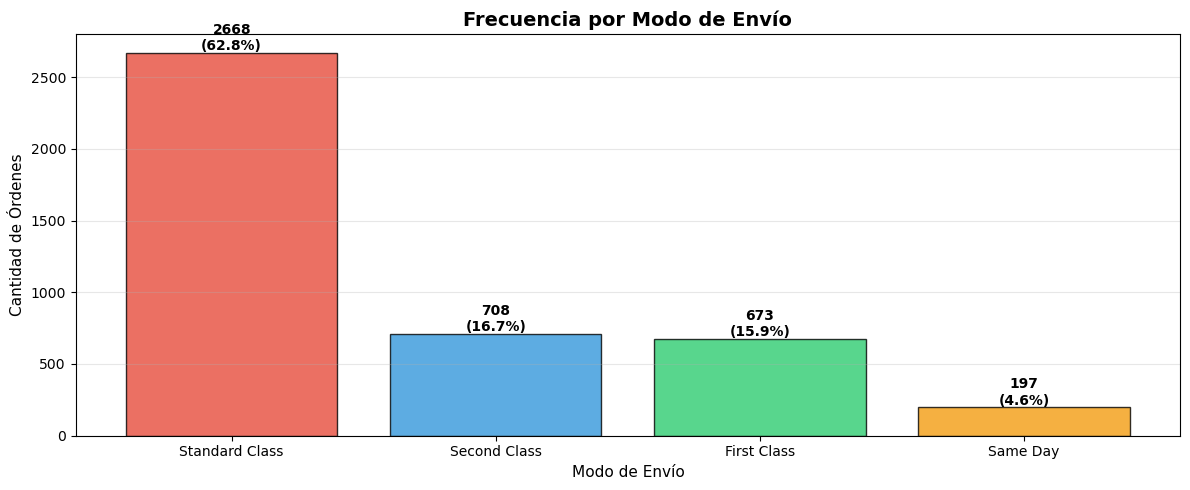

ANÁLISIS - MODO DE ENVÍO

DISTRIBUCIÓN POR MODO DE ENVÍO:
  Standard Class: 2668 órdenes (62.84%)
  Second Class: 708 órdenes (16.67%)
  First Class: 673 órdenes (15.85%)
  Same Day: 197 órdenes (4.64%)


In [17]:
# Gráfico de barras para Modo de Envío
# Conclusi?n: cuantifica la preferencia por cada modo de env?o y respalda decisiones de capacidad y costos.
fig, ax = plt.subplots(figsize=(12, 5))

ship_mode_counts = data['Ship Mode'].value_counts().sort_values(ascending=False)
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
bars = ax.bar(ship_mode_counts.index, ship_mode_counts.values, color=colors, edgecolor='black', alpha=0.8)

ax.set_title('Frecuencia por Modo de Envío', fontsize=14, fontweight='bold')
ax.set_xlabel('Modo de Envío', fontsize=11)
ax.set_ylabel('Cantidad de Órdenes', fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras y porcentajes
total = ship_mode_counts.sum()
for i, (idx, val) in enumerate(zip(ship_mode_counts.index, ship_mode_counts.values)):
    percentage = (val / total) * 100
    ax.text(i, val + 20, f'{val}\n({percentage:.1f}%)', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("=" * 60)
print("ANÁLISIS - MODO DE ENVÍO")
print("=" * 60)
print(f"\nDISTRIBUCIÓN POR MODO DE ENVÍO:")
for mode, count in ship_mode_counts.items():
    percentage = (count / total) * 100
    print(f"  {mode}: {count} órdenes ({percentage:.2f}%)")

## Visualizaciones Bivariantes con Matplotlib

### 1. Dispersion: Ventas vs. Beneficios

Para comprender que tan rentables son los pedidos segun su volumen de ventas, se grafican ambos campos en conjunto. El color indica el nivel de descuento aplicado.


In [ ]:
# Grafico de dispersion: Ventas vs Beneficios
# Conclusi?n: permite detectar pedidos con p?rdidas pese a altas ventas y relacionar los descuentos con la rentabilidad.
fig, ax = plt.subplots(figsize=(12, 6))

scatter = ax.scatter(
    data['Sales'],
    data['Profit'],
    c=data['Discount'],
    cmap='viridis',
    alpha=0.65,
    s=45,
    edgecolor='black',
    linewidth=0.4,
    label='Pedidos'
)

ax.axhline(0, color='red', linestyle='--', linewidth=1, label='Punto de equilibrio')
ax.set_title('Relacion entre Ventas y Beneficios', fontsize=14, fontweight='bold')
ax.set_xlabel('Ventas ($)', fontsize=12)
ax.set_ylabel('Beneficios ($)', fontsize=12)
ax.grid(alpha=0.3, linestyle='--')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Descuento aplicado')
ax.legend()

plt.tight_layout()
plt.show()


## Visualizaciones Univariantes con Seaborn

### 1. Boxplots - Ventas por Categoría y Segmento

C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\1655338285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Sales', ax=axes[0], palette='Set1')
C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\1655338285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Segment', y='Sales', ax=axes[1], palette='Set2')


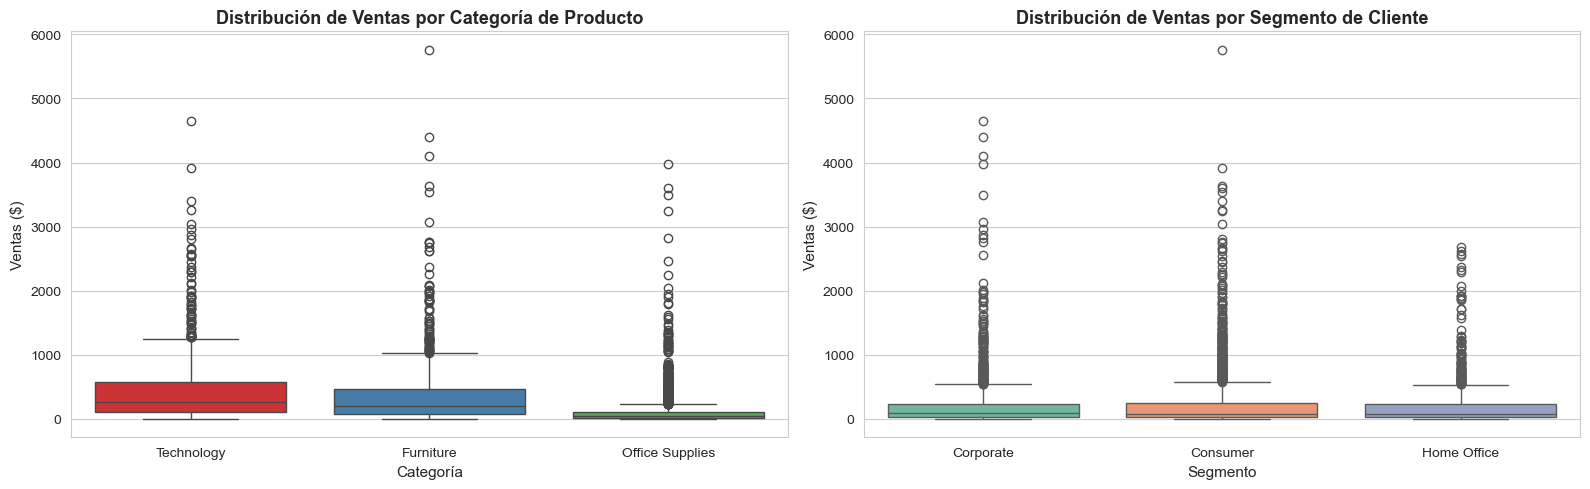

ANÁLISIS ESTADÍSTICO - VENTAS POR CATEGORÍA Y SEGMENTO

VENTAS POR CATEGORÍA:
                  count    mean     std   min     25%     50%     75%      max
Category                                                                      
Furniture         802.0  400.78  561.01  2.96   82.68  202.28  459.92  5759.96
Office Supplies  2604.0  116.65  254.68  1.11   20.64   46.47  104.19  3979.29
Technology        840.0  453.85  550.46  2.38  112.66  259.23  571.42  4643.80

VENTAS POR SEGMENTO:
              count    mean     std   min    25%    50%     75%      max
Segment                                                                 
Consumer     2284.0  237.98  427.12  1.11  30.02  81.52  251.24  5759.96
Corporate    1273.0  235.55  437.63  1.36  32.00  86.56  236.10  4643.80
Home Office   689.0  236.63  406.67  1.44  30.48  78.12  232.08  2676.67


In [18]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Boxplot: Ventas por Categoría y Segmento
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Boxplot: Ventas por Categoría
sns.boxplot(data=data, x='Category', y='Sales', ax=axes[0], palette='Set1')
axes[0].set_title('Distribución de Ventas por Categoría de Producto', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Categoría', fontsize=11)
axes[0].set_ylabel('Ventas ($)', fontsize=11)

# Boxplot: Ventas por Segmento
sns.boxplot(data=data, x='Segment', y='Sales', ax=axes[1], palette='Set2')
axes[1].set_title('Distribución de Ventas por Segmento de Cliente', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Segmento', fontsize=11)
axes[1].set_ylabel('Ventas ($)', fontsize=11)

plt.tight_layout()
plt.show()

print("=" * 70)
print("ANÁLISIS ESTADÍSTICO - VENTAS POR CATEGORÍA Y SEGMENTO")
print("=" * 70)
print("\nVENTAS POR CATEGORÍA:")
print(data.groupby('Category')['Sales'].describe().round(2))
print("\nVENTAS POR SEGMENTO:")
print(data.groupby('Segment')['Sales'].describe().round(2))

### 2. Violinplots - Beneficios por Categoría y Segmento

C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\912642130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Category', y='Profit', ax=axes[0], palette='husl')
C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\912642130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Segment', y='Profit', ax=axes[1], palette='Set2')


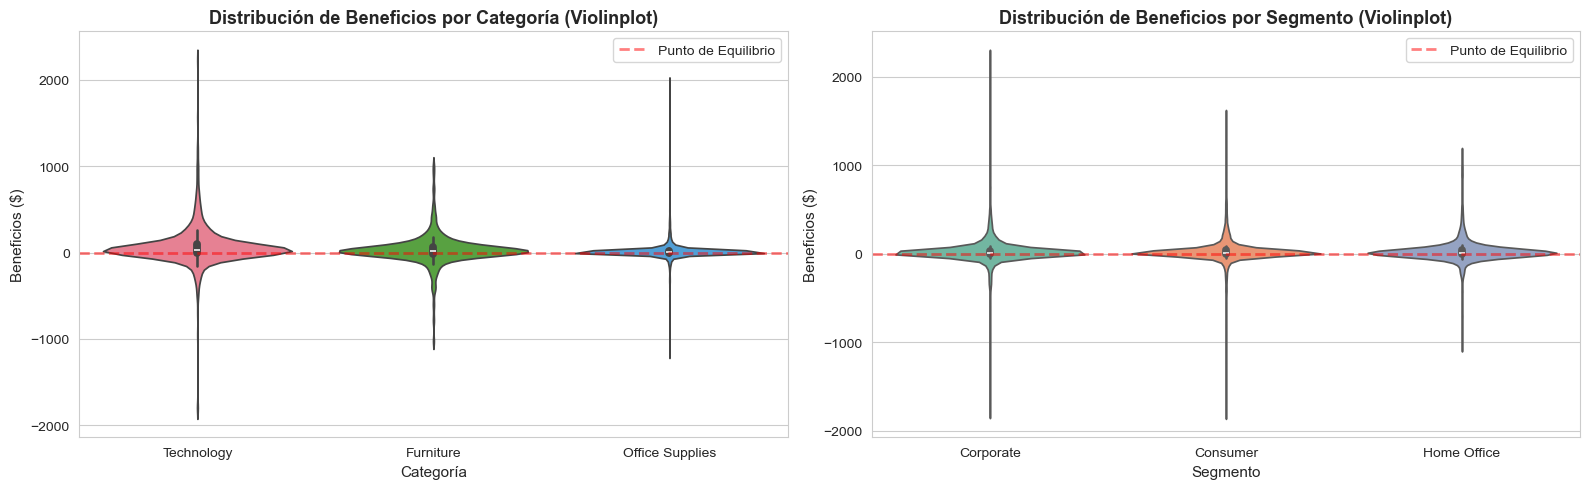

ANÁLISIS ESTADÍSTICO - BENEFICIOS POR CATEGORÍA Y SEGMENTO

BENEFICIOS POR CATEGORÍA:
                  count   mean     std      min    25%    50%     75%      max
Category                                                                      
Furniture         802.0  30.98  172.71 -1024.55 -10.66  15.92   67.50  1013.13
Office Supplies  2604.0  13.22   93.19 -1181.28   0.00   6.00   20.16  1989.54
Technology        840.0  69.44  228.46 -1806.24   0.71  30.52  104.55  2229.02

BENEFICIOS POR SEGMENTO:
              count   mean     std      min   25%   50%    75%      max
Segment                                                                
Consumer     2284.0  28.28  141.99 -1806.24  0.00  8.84  35.99  1563.48
Corporate    1273.0  26.68  156.70 -1783.08  0.00  9.96  35.64  2229.02
Home Office   689.0  27.64  147.88 -1024.55 -3.09  8.04  36.30  1114.51


In [19]:
# Violinplots: Beneficios por Categoría y Segmento
# Conclusi?n: compara la variabilidad de beneficios por segmento, mostrando qu? combinaciones generan m?rgenes m?s estables.
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Violinplot: Beneficios por Categoría
sns.violinplot(data=data, x='Category', y='Profit', ax=axes[0], palette='husl')
axes[0].set_title('Distribución de Beneficios por Categoría (Violinplot)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Categoría', fontsize=11)
axes[0].set_ylabel('Beneficios ($)', fontsize=11)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Punto de Equilibrio')
axes[0].legend()

# Violinplot: Beneficios por Segmento
sns.violinplot(data=data, x='Segment', y='Profit', ax=axes[1], palette='Set2')
axes[1].set_title('Distribución de Beneficios por Segmento (Violinplot)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Segmento', fontsize=11)
axes[1].set_ylabel('Beneficios ($)', fontsize=11)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Punto de Equilibrio')
axes[1].legend()

plt.tight_layout()
plt.show()

print("=" * 70)
print("ANÁLISIS ESTADÍSTICO - BENEFICIOS POR CATEGORÍA Y SEGMENTO")
print("=" * 70)
print("\nBENEFICIOS POR CATEGORÍA:")
print(data.groupby('Category')['Profit'].describe().round(2))
print("\nBENEFICIOS POR SEGMENTO:")
print(data.groupby('Segment')['Profit'].describe().round(2))

### 3. Boxplots Combinados - Descuentos y Costo de Envío

C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\4028810720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Discount', ax=axes[0], palette='RdYlGn_r')
C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\4028810720.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Shipping Cost', ax=axes[1], palette='Blues')


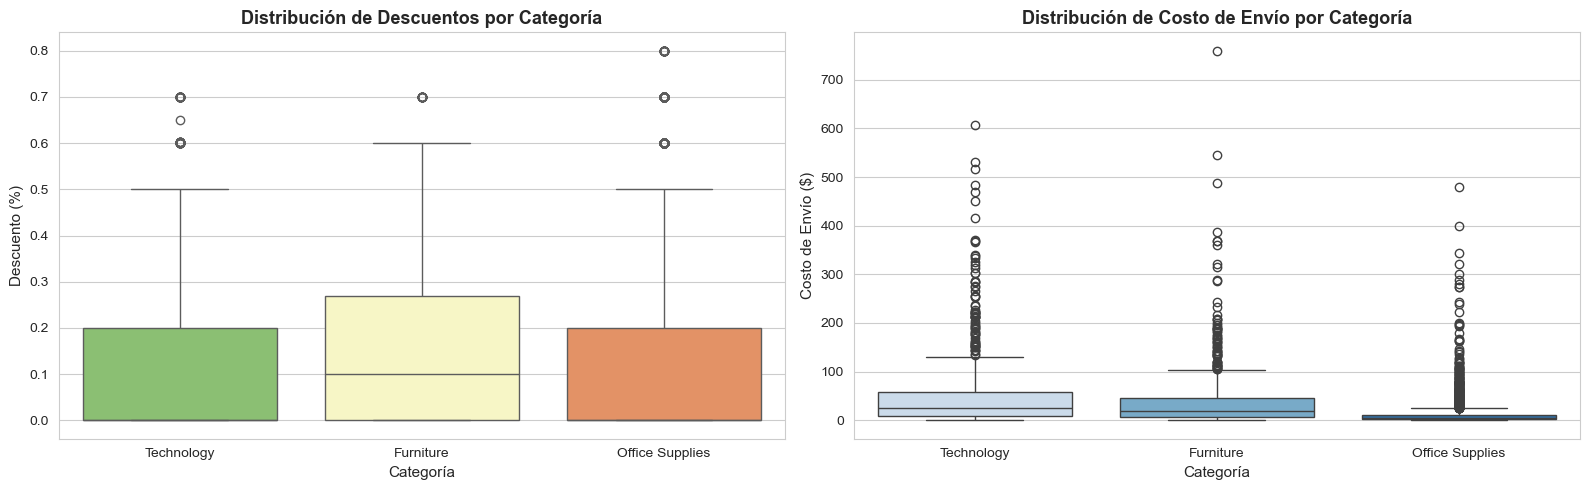

ANÁLISIS ESTADÍSTICO - DESCUENTOS Y COSTO DE ENVÍO

DESCUENTOS POR CATEGORÍA:
                  count    mean     std  min  25%  50%   75%  max
Category                                                         
Furniture         802.0  0.1685  0.2000  0.0  0.0  0.1  0.27  0.7
Office Supplies  2604.0  0.1436  0.2240  0.0  0.0  0.0  0.20  0.8
Technology        840.0  0.1351  0.2046  0.0  0.0  0.0  0.20  0.7

COSTO DE ENVÍO POR CATEGORÍA:
                  count   mean    std   min   25%    50%    75%     max
Category                                                               
Furniture         802.0  38.08  61.58  0.08  6.47  18.37  46.22  759.47
Office Supplies  2604.0  12.11  28.54  0.03  1.74   4.42  10.85  479.96
Technology        840.0  50.14  73.51  0.18  9.28  24.66  58.67  607.34


In [20]:
# Boxplots: Descuentos y Costo de Envío por Categoría
# Conclusi?n: contrasta pol?ticas de descuento y gastos log?sticos por categor?a para encontrar desequilibrios.
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Boxplot: Descuentos por Categoría
sns.boxplot(data=data, x='Category', y='Discount', ax=axes[0], palette='RdYlGn_r')
axes[0].set_title('Distribución de Descuentos por Categoría', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Categoría', fontsize=11)
axes[0].set_ylabel('Descuento (%)', fontsize=11)

# Boxplot: Costo de Envío por Categoría
sns.boxplot(data=data, x='Category', y='Shipping Cost', ax=axes[1], palette='Blues')
axes[1].set_title('Distribución de Costo de Envío por Categoría', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Categoría', fontsize=11)
axes[1].set_ylabel('Costo de Envío ($)', fontsize=11)

plt.tight_layout()
plt.show()

print("=" * 70)
print("ANÁLISIS ESTADÍSTICO - DESCUENTOS Y COSTO DE ENVÍO")
print("=" * 70)
print("\nDESCUENTOS POR CATEGORÍA:")
print(data.groupby('Category')['Discount'].describe().round(4))
print("\nCOSTO DE ENVÍO POR CATEGORÍA:")
print(data.groupby('Category')['Shipping Cost'].describe().round(2))

### 4. Stripplot - Visualizar Puntos Individuales (Descuentos por Segmento)

C:\Users\hermosil\AppData\Local\Temp\ipykernel_12916\3368303662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Segment', y='Quantity', ax=ax, palette='Set2', width=0.6)


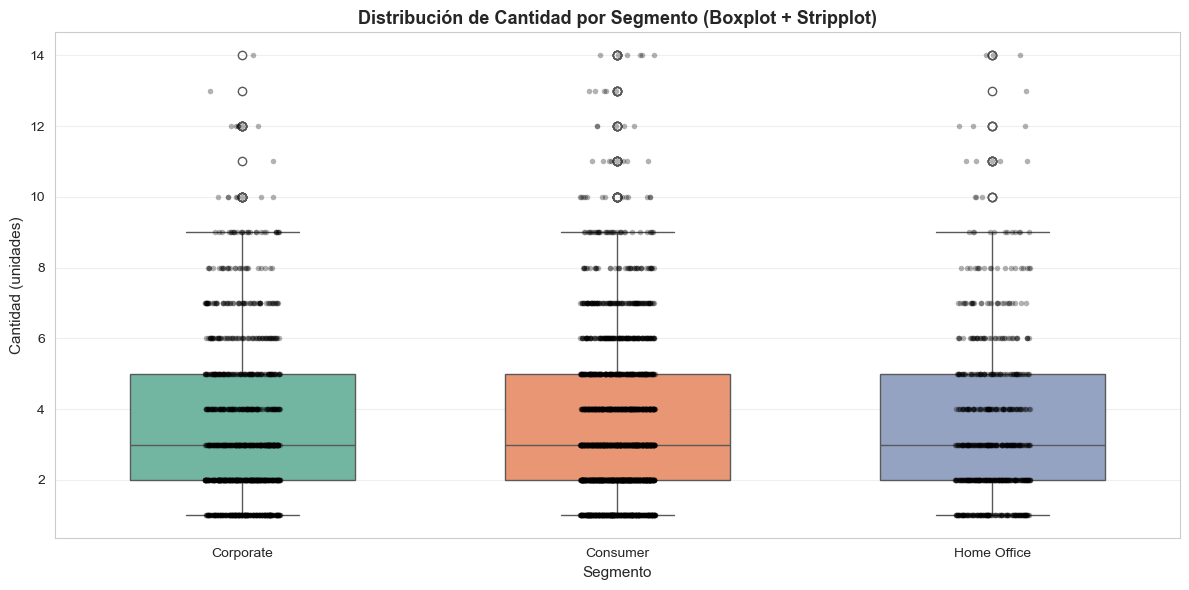

ANÁLISIS ESTADÍSTICO - CANTIDAD POR SEGMENTO

CANTIDAD POR SEGMENTO:
              count  mean   std  min  25%  50%  75%   max
Segment                                                  
Consumer     2284.0  3.47  2.20  1.0  2.0  3.0  5.0  14.0
Corporate    1273.0  3.40  2.21  1.0  2.0  3.0  5.0  14.0
Home Office   689.0  3.46  2.35  1.0  2.0  3.0  5.0  14.0


In [23]:
# Stripplot con Boxplot superpuesto - Cantidad por Segmento
# Conclusi?n: revela la dispersi?n de unidades por segmento y resalta outliers que podr?an requerir condiciones especiales.
fig, ax = plt.subplots(figsize=(12, 6))

# Boxplot de fondo
sns.boxplot(data=data, x='Segment', y='Quantity', ax=ax, palette='Set2', width=0.6)

# Stripplot superpuesto para ver puntos individuales
sns.stripplot(data=data, x='Segment', y='Quantity', ax=ax, color='black', alpha=0.3, size=4, jitter=True)

ax.set_title('Distribución de Cantidad por Segmento (Boxplot + Stripplot)', fontsize=13, fontweight='bold')
ax.set_xlabel('Segmento', fontsize=11)
ax.set_ylabel('Cantidad (unidades)', fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)
print("ANÁLISIS ESTADÍSTICO - CANTIDAD POR SEGMENTO")
print("=" * 70)
print("\nCANTIDAD POR SEGMENTO:")
print(data.groupby('Segment')['Quantity'].describe().round(2))

### 5. Gráfico KDE (Kernel Density Estimate) - Distribuciones Suavizadas

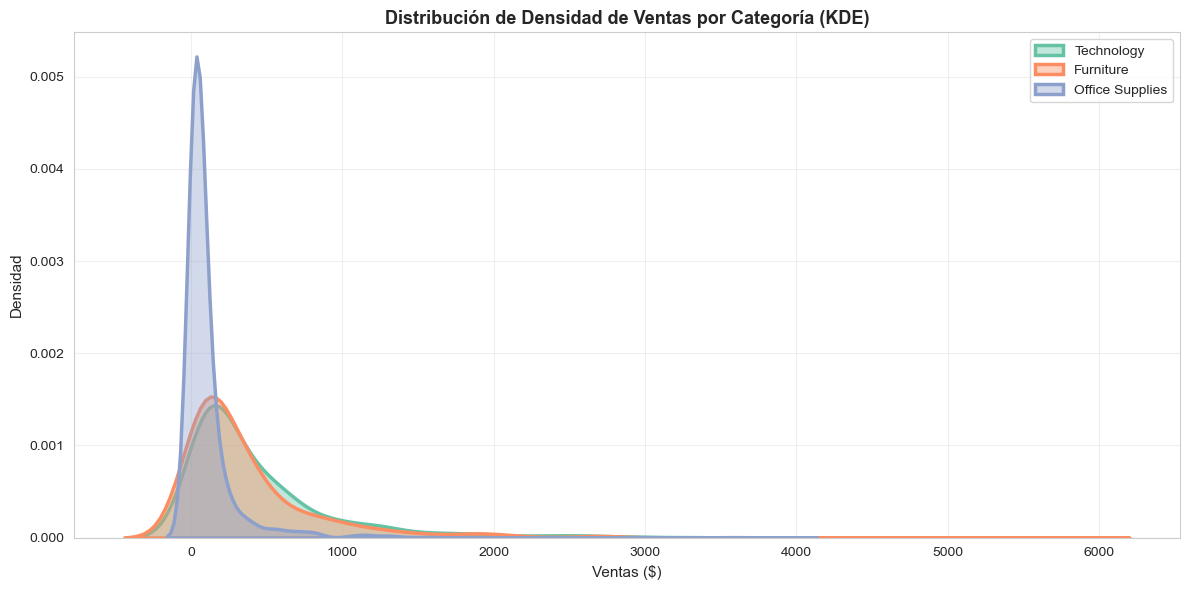

RESUMEN COMPARATIVO - DISTRIBUCIONES DE VENTAS

Furniture:
  Media: $400.78
  Mediana: $202.28
  Q1 (25%): $82.68
  Q3 (75%): $459.92
  Rango Intercuartílico: $377.24

Office Supplies:
  Media: $116.65
  Mediana: $46.47
  Q1 (25%): $20.64
  Q3 (75%): $104.19
  Rango Intercuartílico: $83.55

Technology:
  Media: $453.85
  Mediana: $259.23
  Q1 (25%): $112.66
  Q3 (75%): $571.42
  Rango Intercuartílico: $458.76


In [22]:
# KDE plot: Densidad de Ventas por Categoría
# Conclusi?n: permite comparar la concentraci?n de ventas por categor?a y detectar traslapes entre perfiles de clientes.
fig, ax = plt.subplots(figsize=(12, 6))

# Crear KDE para cada categoría
for category in data['Category'].unique():
    category_data = data[data['Category'] == category]['Sales']
    sns.kdeplot(data=category_data, label=category, linewidth=2.5, fill=True, alpha=0.4, ax=ax)

ax.set_title('Distribución de Densidad de Ventas por Categoría (KDE)', fontsize=13, fontweight='bold')
ax.set_xlabel('Ventas ($)', fontsize=11)
ax.set_ylabel('Densidad', fontsize=11)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 70)
print("RESUMEN COMPARATIVO - DISTRIBUCIONES DE VENTAS")
print("=" * 70)
for category in sorted(data['Category'].unique()):
    category_data = data[data['Category'] == category]['Sales']
    print(f"\n{category}:")
    print(f"  Media: ${category_data.mean():.2f}")
    print(f"  Mediana: ${category_data.median():.2f}")
    print(f"  Q1 (25%): ${category_data.quantile(0.25):.2f}")
    print(f"  Q3 (75%): ${category_data.quantile(0.75):.2f}")
    print(f"  Rango Intercuartílico: ${category_data.quantile(0.75) - category_data.quantile(0.25):.2f}")

## Visualizaciones Multivariantes con Seaborn

### 1. Heatmap de correlacion

Se analizan las relaciones entre variables numericas clave (Sales, Profit, Discount, Quantity y Shipping Cost) para identificar patrones de comportamiento conjuntos.


In [ ]:
# Heatmap de correlacion con Seaborn
# Conclusi?n: resume la fuerza de relaci?n entre m?tricas clave (ventas, descuentos, costos) para priorizar an?lisis causales.
numeric_cols = ['Sales', 'Profit', 'Discount', 'Quantity', 'Shipping Cost']
corr_matrix = data[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Coeficiente de correlacion'}
)

ax.set_title('Correlacion entre variables numericas clave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Figura combinada de subplots

Se construye una figura 2x2 con cuatro vistas complementarias (dispersión, histograma, boxplot y barras) para resumir distintas perspectivas del comportamiento comercial.


In [ ]:
# Figura con cuatro subplots y un titulo general
# Conclusi?n: integra en una sola vista los patrones clave de ventas, beneficios, categor?as y log?stica para reportes ejecutivos.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Resumen grafico de metricas clave', fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.35, wspace=0.2)

# (1) Dispersón Ventas vs Beneficios por segmento
sns.scatterplot(
    ax=axes[0, 0],
    data=data,
    x='Sales',
    y='Profit',
    hue='Segment',
    palette='Dark2',
    alpha=0.7,
    s=45,
    edgecolor='black',
    linewidth=0.3
)
axes[0, 0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[0, 0].set_title('Ventas vs Beneficios por segmento', fontsize=12)
axes[0, 0].set_xlabel('Ventas ($)')
axes[0, 0].set_ylabel('Beneficios ($)')
axes[0, 0].grid(alpha=0.3, linestyle='--')
axes[0, 0].legend(title='Segmento', fontsize=9, loc='lower right', frameon=False)

# (2) Histograma de Ventas
sns.histplot(ax=axes[0, 1], data=data, x='Sales', bins=40, color='steelblue', edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Distribucion de Ventas', fontsize=12)
axes[0, 1].set_xlabel('Ventas ($)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(axis='y', alpha=0.3)

# (3) Boxplot Beneficios por categoria
sns.boxplot(ax=axes[1, 0], data=data, x='Category', y='Profit', palette='Set2')
axes[1, 0].axhline(0, color='gray', linestyle='--', linewidth=1)
axes[1, 0].set_title('Beneficios por categoria', fontsize=12)
axes[1, 0].set_xlabel('Categoria')
axes[1, 0].set_ylabel('Beneficios ($)')
axes[1, 0].tick_params(axis='x', rotation=15)

# (4) Barras de costo de envio promedio por modo
avg_shipping = (
    data.groupby('Ship Mode')['Shipping Cost']
    .mean()
    .sort_values()
)
sns.barplot(
    ax=axes[1, 1],
    x=avg_shipping.values,
    y=avg_shipping.index,
    palette='YlOrBr'
)
axes[1, 1].set_title('Costo promedio por modo de envio', fontsize=12)
axes[1, 1].set_xlabel('Costo promedio ($)')
axes[1, 1].set_ylabel('Modo de envio')
axes[1, 1].grid(axis='x', alpha=0.2, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.97])

output_dir = Path('figures')
output_dir.mkdir(exist_ok=True)
fig.savefig(output_dir / 'resumen_metricas.png', dpi=300, bbox_inches='tight')

plt.show()
